In [173]:
import numpy as np
import pandas as pd
import pyvista as pv
from pyvista import examples as pvexamples
import matplotlib.pyplot as plt
import os

from skimage.transform import resize
from scipy.io import loadmat, savemat

In [63]:
facies = np.load('geomodel_data/facies.npy')
logperm = np.load('geomodel_data/log_perm.npy')

print('Facies: {} | LogPerm: {}'.format(facies.shape, logperm.shape))

Facies: (318, 128, 128, 32) | LogPerm: (318, 128, 128, 32)


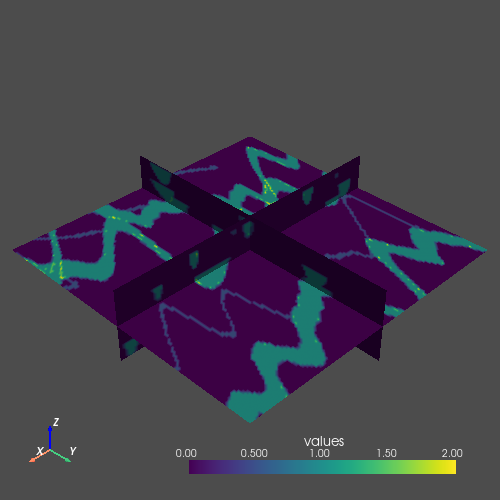

In [158]:
mesh = pv.wrap(np.flip(facies[0]))
slices = mesh.slice_orthogonal()
slices.plot(jupyter_backend='static', window_size=(500,500))

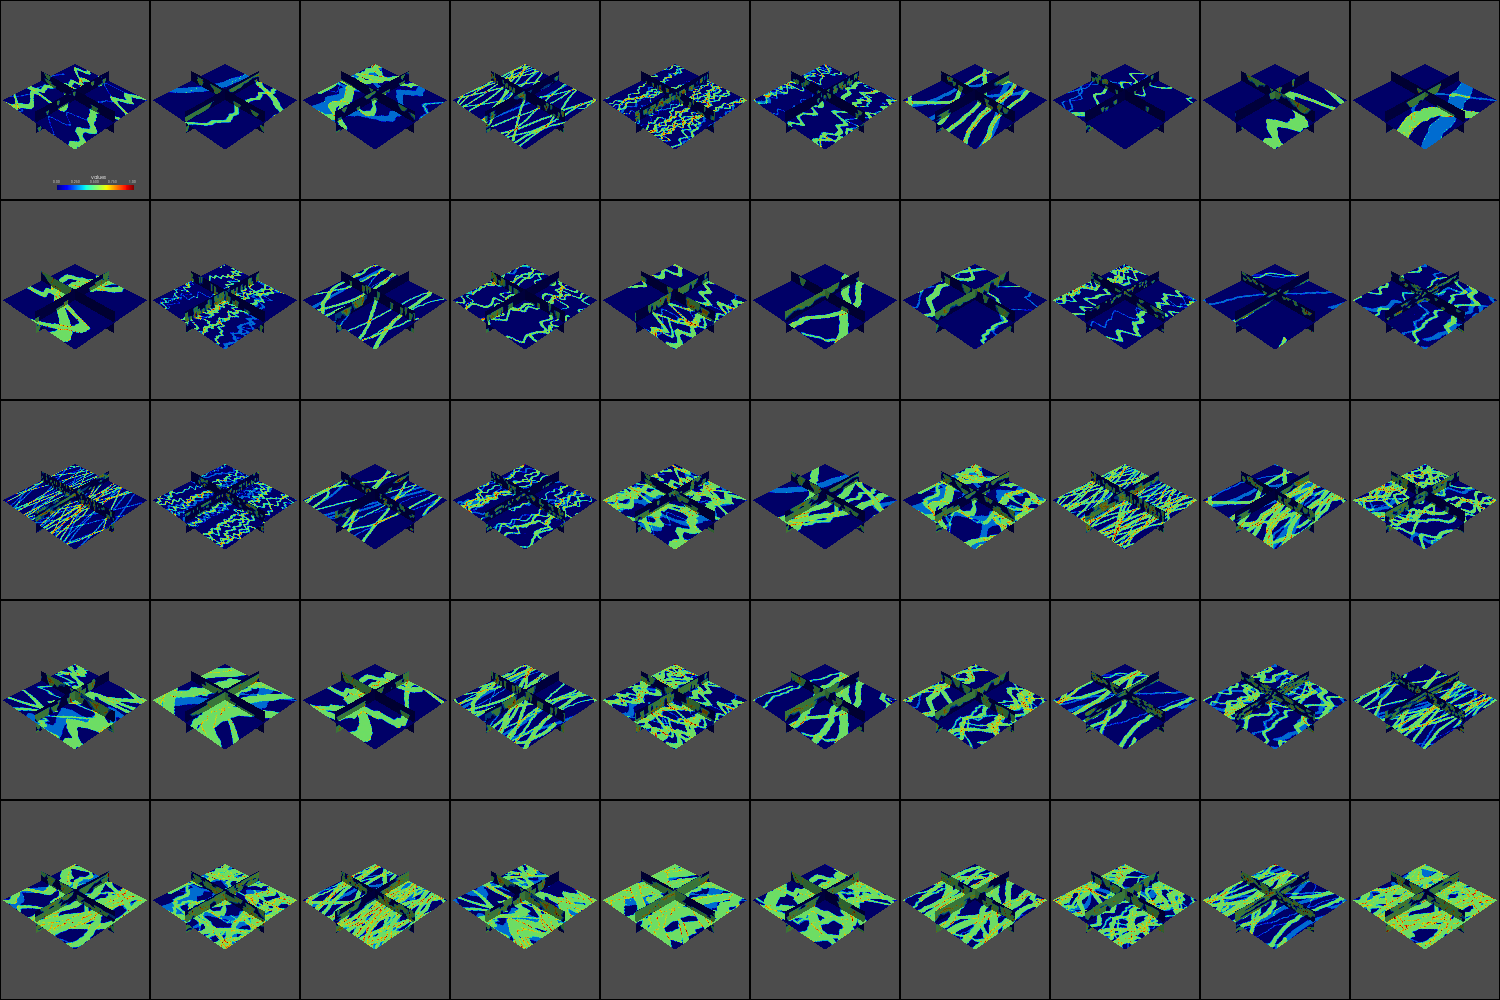

In [171]:
k=0
nrows, ncols = 5, 10
p = pv.Plotter(shape=(nrows,ncols))
for i in range(nrows):
    for j in range(ncols):
        p.subplot(i,j)
        mesh = pv.wrap(np.flip(facies[k]))
        slices = mesh.slice_orthogonal()
        p.add_mesh(slices, cmap='jet')
        k+=1
p.show(jupyter_backend='static', window_size=(1500,1000))

***

In [62]:
# path = 'C:/Users/Misael Morales/OneDrive - The University of Texas at Austin/DiReCT Research/MLTrainingImages'
# facies_maps = np.ndarray(shape=(318,128*128*32))
# i = 0

# for root, dirs, files in os.walk(path):
#     for file in files:
#         if file.endswith('.mat'):
#             fullfile = os.path.join(root, file)
#             data = loadmat(fullfile)['Facies'].reshape(128,256,256).T
#             resz = resize(data, (128,128,32), anti_aliasing=True).T.reshape(-1,1)
#             norm = np.round(np.unique(data)[-1]*(resz-resz.min())/(resz.max()-resz.min()))
#             facies_maps[i] = np.squeeze(norm)
#             i += 1
# print(facies_maps.shape)
# print(facies_maps.min(), facies_maps.max())

# mdic = {"Label":"TI", "Facies":facies_maps}
# savemat('geomodel_data/ti.mat', mdic)

***
# END